# 0D Filtrations And Applications
## Topology Lecture 9/6/2018
## Chris Tralie

In [2]:
%matplotlib notebook
import numpy as np
from scipy import ndimage
from ripser import ripser, plot_dgms
import matplotlib.pyplot as plt
from scipy import sparse
import time
import PIL
from MergeTree import *
from mpl_toolkits.mplot3d import Axes3D
import sys 
sys.path.append("pyhks")
from HKS import *

import ipywidgets as widgets
from IPython.display import display


## Overview of 0D Persistence for Point Clouds

FloatSlider(value=1.0, continuous_update=False, description='\\(\\tau :\\)', max=31.40027243025217)

<IPython.core.display.Javascript object>


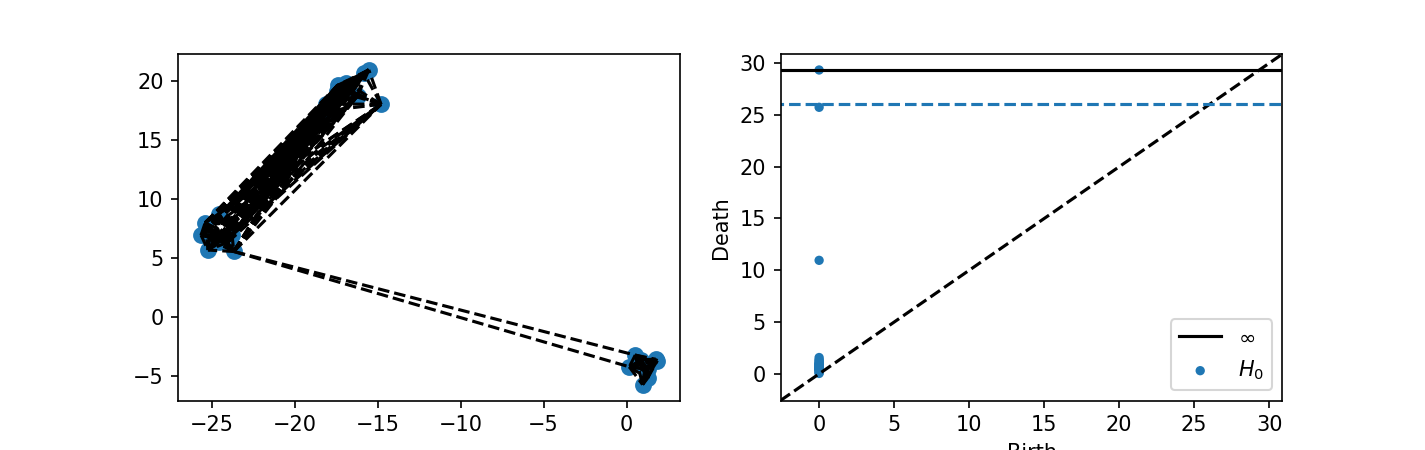

In [5]:
# First setup point cloud
np.random.seed(0)
NClusters = 3
PPC = 10 #Points per cluster
N = NClusters*PPC
X = np.zeros((N, 2))
for c in range(NClusters):
    X[c*PPC:(c+1)*PPC, :] = np.random.randn(PPC, 2) + 10*np.random.randn(2)[None, :]

# Compute persistence diagram
res = ripser(X, maxdim=0)
H0 = res['dgms'][0]
D = res['dm']
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=0.0, max = np.max(D), x=5,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.scatter(X[:, 0], X[:, 1], 50)
    for i in range(N):
        for j in range(i+1, N):
            if D[i, j] < cutoff:
                ax1.plot(X[[i, j], 0], X[[i, j], 1], 'k', linestyle='--')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([-0.1*np.max(D), np.max(D)], [cutoff, cutoff], linestyle='--')
    
    
execute_computation1()

## Piecewise Linear Lower Star Filtrations

First, we define a lower star time series filtration function.  Then, we launch into an example

In [6]:
def lower_star_filtration(x):
    N = len(x)
    # Add edges between adjacent points in the time series, with the "distance" 
    # along the edge equal to the max value of the points it connects
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]

FloatSlider(value=-4.3, continuous_update=False, description='\\(\\tau :\\)', max=3.3000000000000003, min=-4.3…

<IPython.core.display.Javascript object>


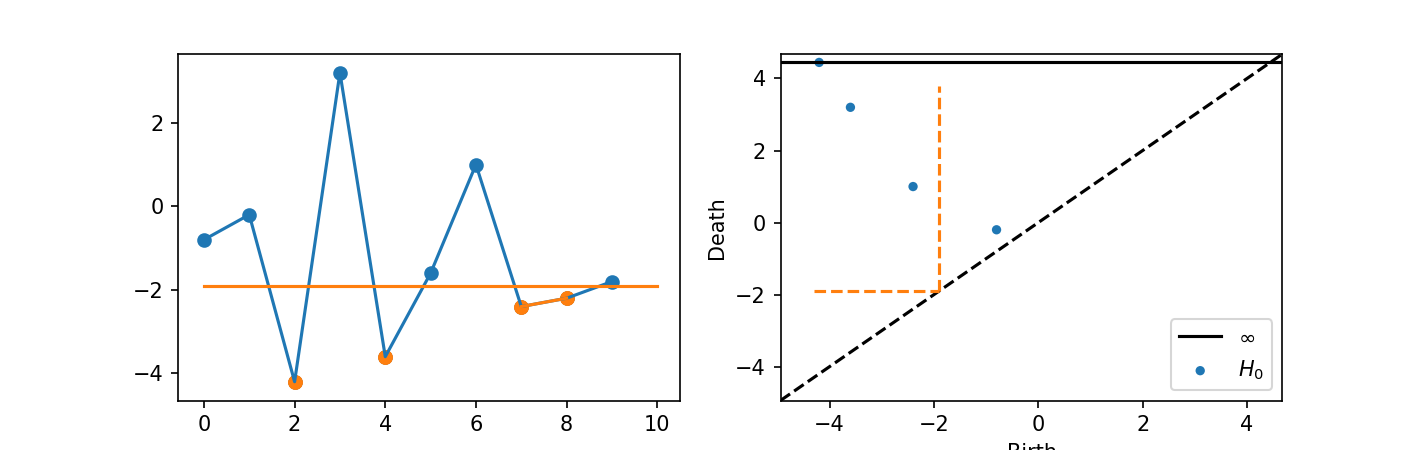

In [9]:
np.random.seed(2)
x = np.random.randn(10)*2
x = np.round(x*5)/5.0

res = ripser(X, maxdim=0)
H0 = lower_star_filtration(x)
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=np.min(x)-0.1, max = np.max(x)+0.1, x=5,step=0.05,value=np.min(x)-0.1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.plot(x)
    ax1.plot([0, len(x)], [cutoff, cutoff])
    ax1.scatter(np.arange(len(x)), x)
    for i in range(len(x)):
        if x[i] <= cutoff:
            ax1.scatter([i]*2, [x[i]]*2, c='C1')
        if i < len(x)-1:
            if x[i] <= cutoff and x[i+1] <= cutoff:
                ax1.plot([i, i+1], x[i:i+2], c='C1')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([np.min(x)-0.1, cutoff], [cutoff, cutoff], linestyle='--', c='C1')
    ax2.plot([cutoff, cutoff], [cutoff, np.max(x)+0.6], linestyle='--', c='C1')
    
    
execute_computation1()

## Sinusoid Example 1

FloatSlider(value=-1.0999688468941564, continuous_update=False, description='\\(\\tau :\\)', max=1.09996884689…

<IPython.core.display.Javascript object>


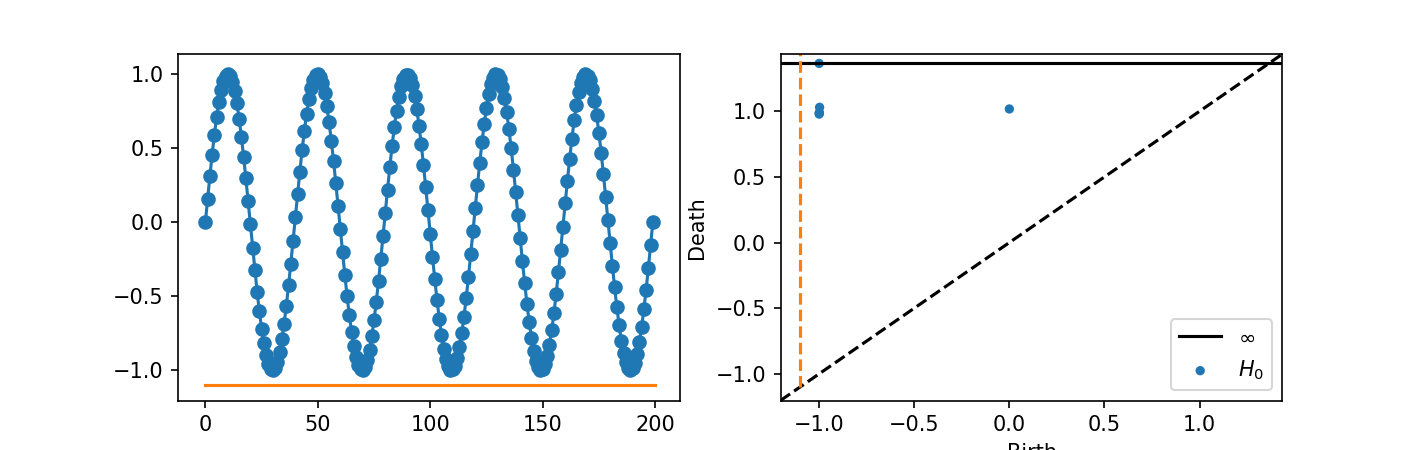

In [12]:
np.random.seed(1)
NPeriods = 5
NSamples = 200
t = np.linspace(0, NPeriods*2*np.pi, NSamples)
x = np.sin(t)

res = ripser(X, maxdim=0)
H0 = lower_star_filtration(x)
H0[:, 1] += 0.02*np.random.randn(H0.shape[0])
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=np.min(x)-0.1, max = np.max(x)+0.1, x=5,step=0.05,value=np.min(x)-0.1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.plot(x)
    ax1.plot([0, len(x)], [cutoff, cutoff])
    ax1.scatter(np.arange(len(x)), x)
    for i in range(len(x)):
        if x[i] <= cutoff:
            ax1.scatter([i]*2, [x[i]]*2, c='C1')
        if i < len(x)-1:
            if x[i] <= cutoff and x[i+1] <= cutoff:
                ax1.plot([i, i+1], x[i:i+2], c='C1')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([np.min(x)-0.1, cutoff], [cutoff, cutoff], linestyle='--', c='C1')
    ax2.plot([cutoff, cutoff], [cutoff, np.max(x)+0.6], linestyle='--', c='C1')
    
    
execute_computation1()

## Sinusoid Example 2

FloatSlider(value=-1.362585530789986, continuous_update=False, description='\\(\\tau :\\)', max=5.362585530789…

<IPython.core.display.Javascript object>


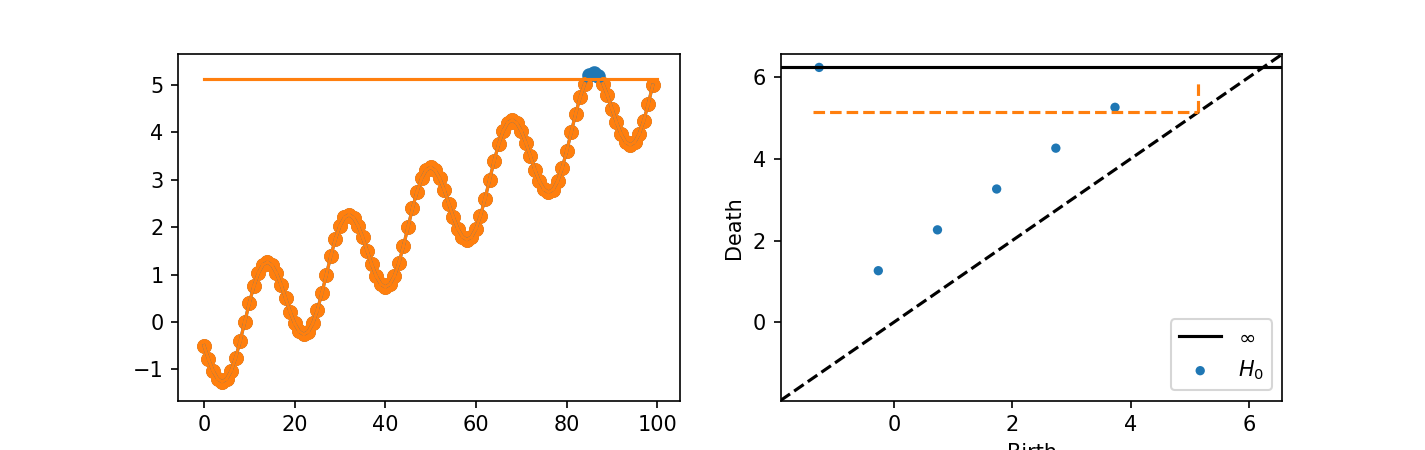

In [13]:
np.random.seed(1)
NPeriods = 5
NSamples = 100
t = np.linspace(-0.5, NPeriods, NSamples)
x = np.sin(2*np.pi*t) + t

res = ripser(X, maxdim=0)
H0 = lower_star_filtration(x)
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=np.min(x)-0.1, max = np.max(x)+0.1, x=5,step=0.05,value=np.min(x)-0.1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.plot(x)
    ax1.plot([0, len(x)], [cutoff, cutoff])
    ax1.scatter(np.arange(len(x)), x)
    for i in range(len(x)):
        if x[i] <= cutoff:
            ax1.scatter([i]*2, [x[i]]*2, c='C1')
        if i < len(x)-1:
            if x[i] <= cutoff and x[i+1] <= cutoff:
                ax1.plot([i, i+1], x[i:i+2], c='C1')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([np.min(x)-0.1, cutoff], [cutoff, cutoff], linestyle='--', c='C1')
    ax2.plot([cutoff, cutoff], [cutoff, np.max(x)+0.6], linestyle='--', c='C1')
    
    
execute_computation1()

<IPython.core.display.Javascript object>


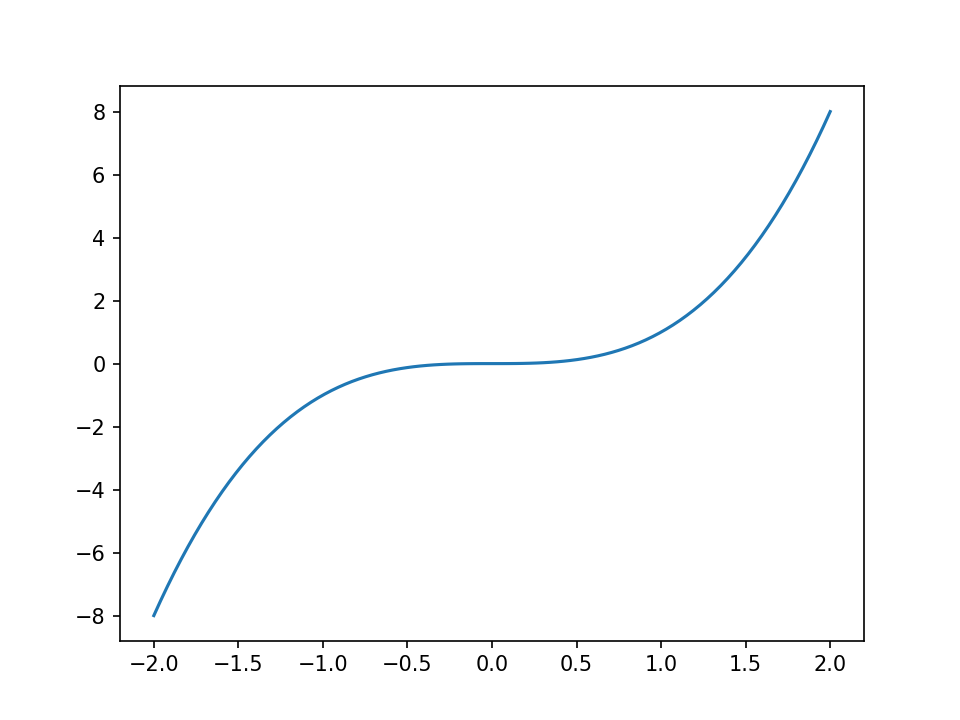

In [17]:
plt.figure()
x = np.linspace(-2, 2, 100)
a = 0
y = x**3 + a*x
plt.plot(x, y)

## Intermezzo: Continuous Functions And Critical Points

## Lower Star Images


First, we define a function to perform the lower star filtration

In [18]:
def lower_star_image(D):
    """
    Construct a lower star filtration on an image
    Parameters
    ----------
    D: ndarray (M, N)
        An array of image data
    Returns
    -------
    I: ndarray (K, 2)
        A 0D persistence diagram corresponding to the sublevelset filtration
    """
    idxs = np.arange(D.shape[0]*D.shape[1])
    idxs = np.reshape(idxs, D.shape)
    I = idxs.flatten()
    J = idxs.flatten()
    V = D.flatten()
    # Do 8 spatial neighbors
    tidxs = np.nan*np.ones((D.shape[0]+2, D.shape[1]+2), dtype=np.int64)
    tidxs[1:-1, 1:-1] = idxs
    tD = np.nan*np.ones_like(tidxs)
    tD[1:-1, 1:-1] = D
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            thisJ = np.roll(tidxs, di, axis=0)
            thisJ = np.roll(thisJ, dj, axis=1)
            thisD = np.roll(tD, di, axis=0)
            thisD = np.roll(thisD, dj, axis=1)
            thisD = np.maximum(thisD, tD)
            # Deal with boundaries
            thisI = tidxs[np.isnan(thisD)==0]
            thisJ = thisJ[np.isnan(thisD)==0]
            thisD = thisD[np.isnan(thisD)==0]
            I = np.concatenate((I, thisI.flatten()))
            J = np.concatenate((J, thisJ.flatten()))
            V = np.concatenate((V, thisD.flatten()))
    sparseDM = sparse.coo_matrix((V, (I, J)), shape=(idxs.size, idxs.size))
    return ripser(sparseDM, distance_matrix=True, maxdim=0)['dgms'][0]

## Lower Star Images: Gaussian Blobs Example

<IPython.core.display.Javascript object>


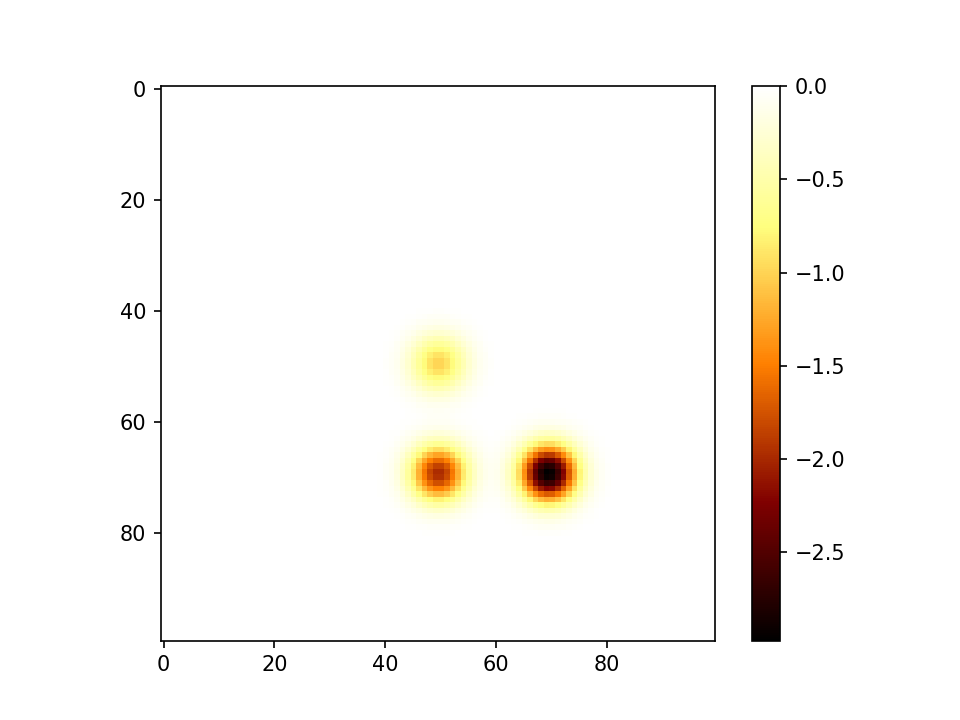

In [19]:
plt.figure()
ts = np.linspace(-1, 1, 100)
x1 = np.exp(-ts**2/(0.1**2))
ts -= 0.4
x2 = np.exp(-ts**2/(0.1**2))

# Define depths of Gaussian blobs
h1 = -1
h2 = -2
h3 = -3
img = h1*x1[None, :]*x1[:, None] + h2*x1[None, :]*x2[:, None] + h3*x2[None, :]*x2[:, None]
plt.imshow(img, cmap = 'afmhot')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


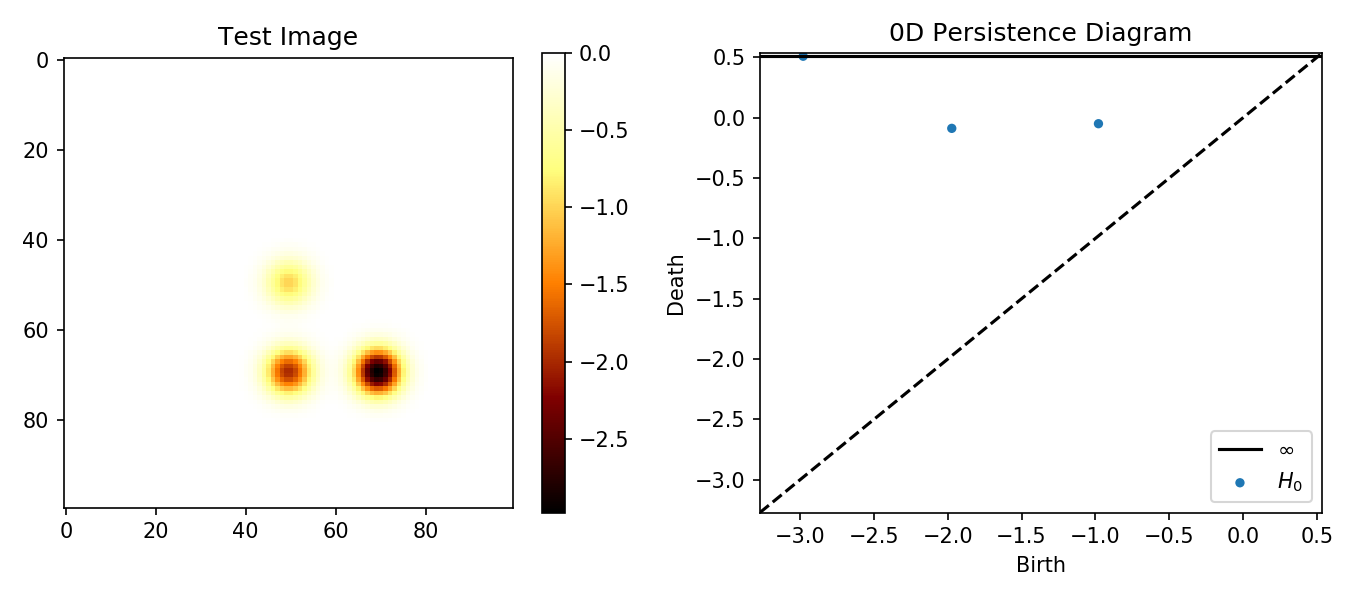

In [20]:
I = lower_star_image(img)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(img, cmap = 'afmhot')
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_dgms(I)
plt.title("0D Persistence Diagram")
plt.tight_layout()
plt.show()

## Wood Cells Example

<img src = "Cells.jpg">

<IPython.core.display.Javascript object>


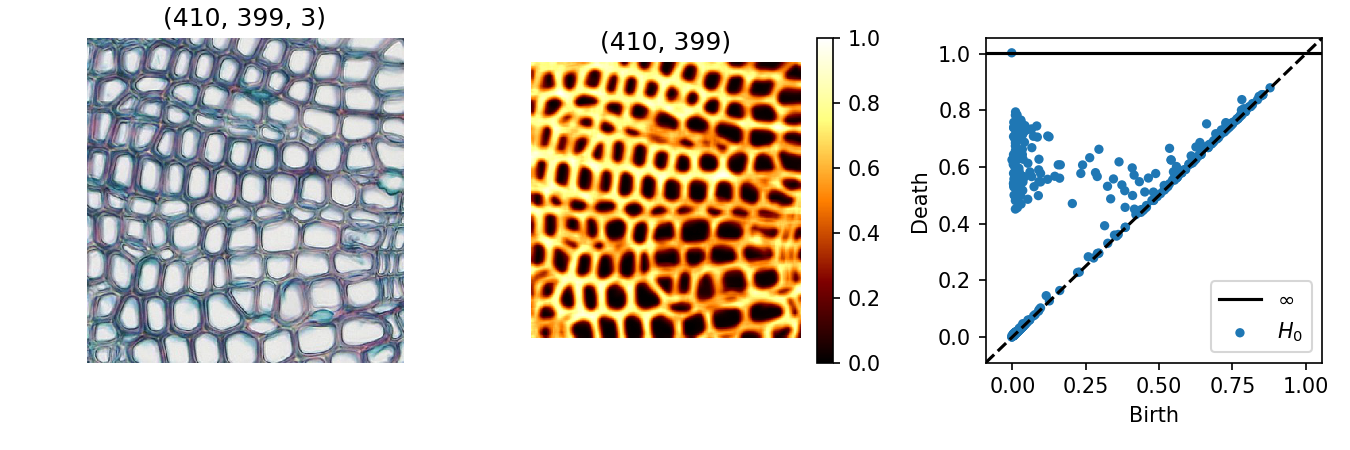

In [22]:
cells_original = plt.imread("Cells.jpg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))
# Normalize to the range [0, 1]
cells_grey = -ndimage.uniform_filter(cells_grey, size=10)
cells_grey = cells_grey - np.min(cells_grey)
cells_grey = cells_grey/np.max(cells_grey)


# Do lower star filtration after adding a little bit of noise
# The noise is a hack to help find representatives for the classes
F = cells_grey + 0.001*np.random.randn(cells_grey.shape[0], cells_grey.shape[1])
I = lower_star_image(F)
I = I[I[:, 1]-I[:, 0] > 0.001, :] # Filter out low persistence values

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.title(cells_original.shape)
plt.imshow(cells_original)
plt.axis('off')
plt.subplot(132)
plt.title(cells_grey.shape)
plt.imshow(cells_grey, cmap='afmhot')
plt.colorbar()
plt.axis('off')
plt.subplot(133)
plot_dgms(I)
plt.tight_layout()
plt.show()

FloatSlider(value=0.0, continuous_update=False, description='\\(\\tau :\\)', max=1.0, step=0.01)

<IPython.core.display.Javascript object>


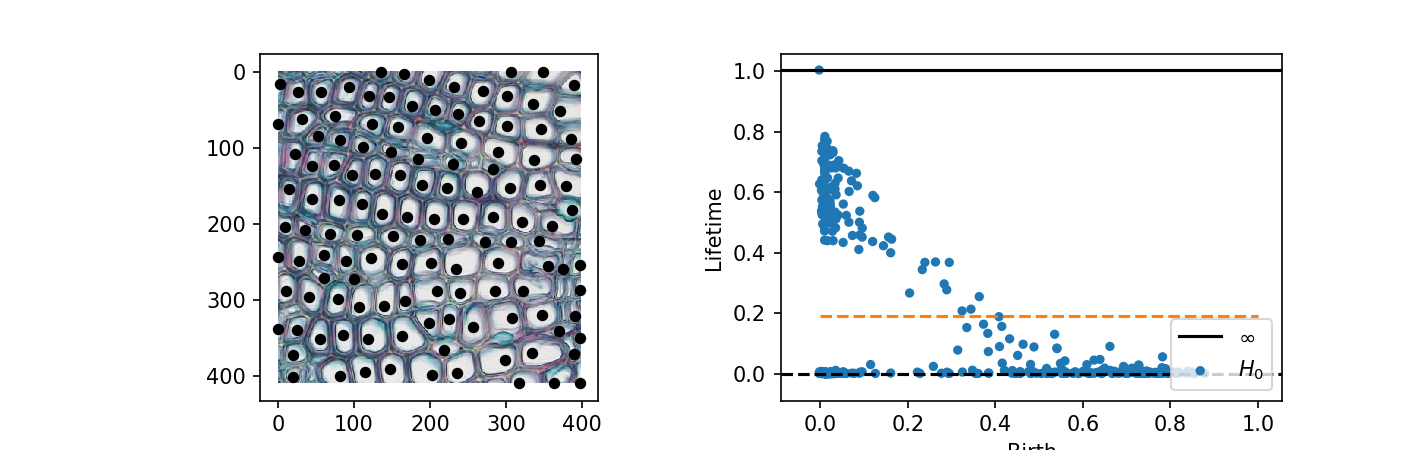

In [23]:


    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=0, max = 1, x=5,step=0.01,value=0.0,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

X, Y = np.meshgrid(np.arange(F.shape[1]), np.arange(F.shape[0]))
X = X.flatten()
Y = Y.flatten()

def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    idxs = np.arange(I.shape[0])
    idxs = idxs[np.abs(I[:, 1] - I[:, 0]) > cutoff]
    ax1.imshow(cells_original)
    for idx in idxs:
        bidx = np.argmin(np.abs(F - I[idx, 0]))
        ax1.scatter(X[bidx], Y[bidx], 20, 'k')
    
    plt.sca(ax2)
    plot_dgms(I, lifetime=True)
    ax2.plot([0, 1], [cutoff, cutoff], linestyle='--', c='C1')
    
    
execute_computation1()

## 3D Shapes Example
First we define a lower star filtration on a general triangle mesh, as well as a method to plot a function on a 3D point cloud

In [24]:
def do0DSublevelsetFiltrationMesh(VPos, ITris, fn):
    x = fn(VPos, ITris)
    N = VPos.shape[0]
    # Add edges between adjacent points in the mesh    
    I, J = getEdges(VPos, ITris)
    V = np.maximum(x[I], x[J])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return ripser(D, distance_matrix=True, maxdim=0)['dgms'][0]

def plotPCfn(VPos, fn, cmap = 'afmhot'):
    """
    plot an XY slice of a mesh with the scalar function used in a 
    sublevelset filtration
    """
    x = fn - np.min(fn)
    x = x/np.max(x)
    c = plt.get_cmap(cmap)
    C = c(np.array(np.round(x*255.0), dtype=np.int64))
    plt.scatter(VPos[:, 0], VPos[:, 1], 20, c=C)
    plt.axis('equal')
    ax = plt.gca()
    ax.set_facecolor((0.3, 0.3, 0.3))

<IPython.core.display.Javascript object>


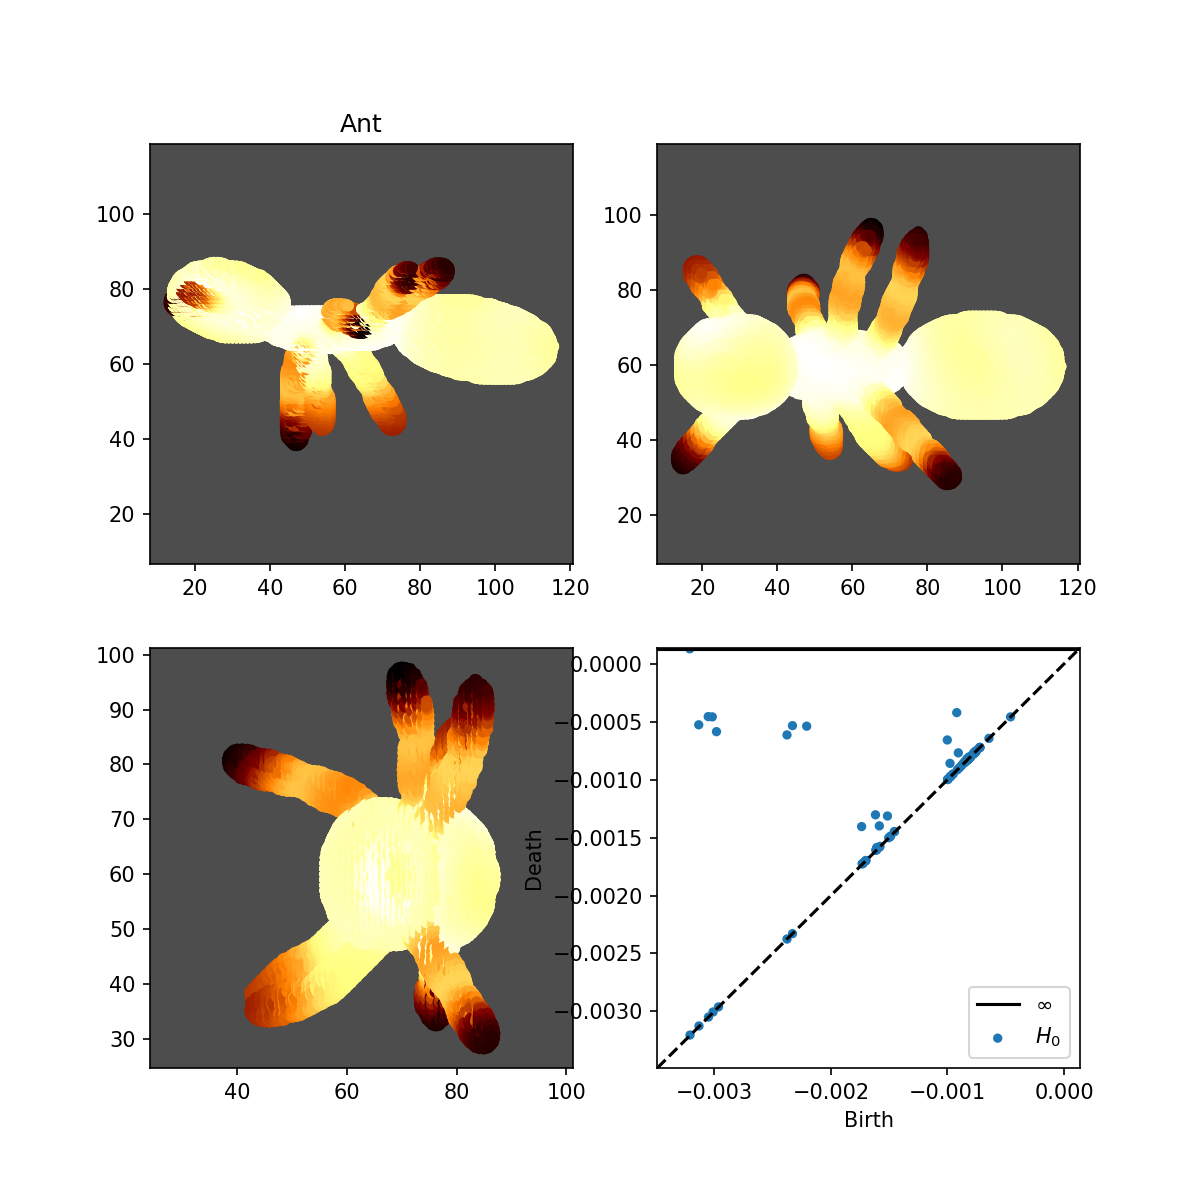

In [26]:
fn = lambda VPos, ITris: -getHKS(VPos, ITris, 20, t = 30)

(VPos, _, ITris) = loadOffFile("Ant0.off")

x = fn(VPos, ITris)
I0 = do0DSublevelsetFiltrationMesh(VPos, ITris, fn)
plt.figure(figsize=(8, 8))
plt.subplot(221)
plotPCfn(VPos[:, [1, 0, 2]], x, cmap = 'afmhot')
plt.title("Ant")
plt.subplot(222)
X = np.array(VPos[:, [1, 2, 0]])
plotPCfn(X, x, cmap = 'afmhot')
plt.subplot(223)
plotPCfn(VPos[:, [0, 2, 1]], x, cmap = 'afmhot')
plt.subplot(224)
plot_dgms([I0])
plt.show()

<IPython.core.display.Javascript object>


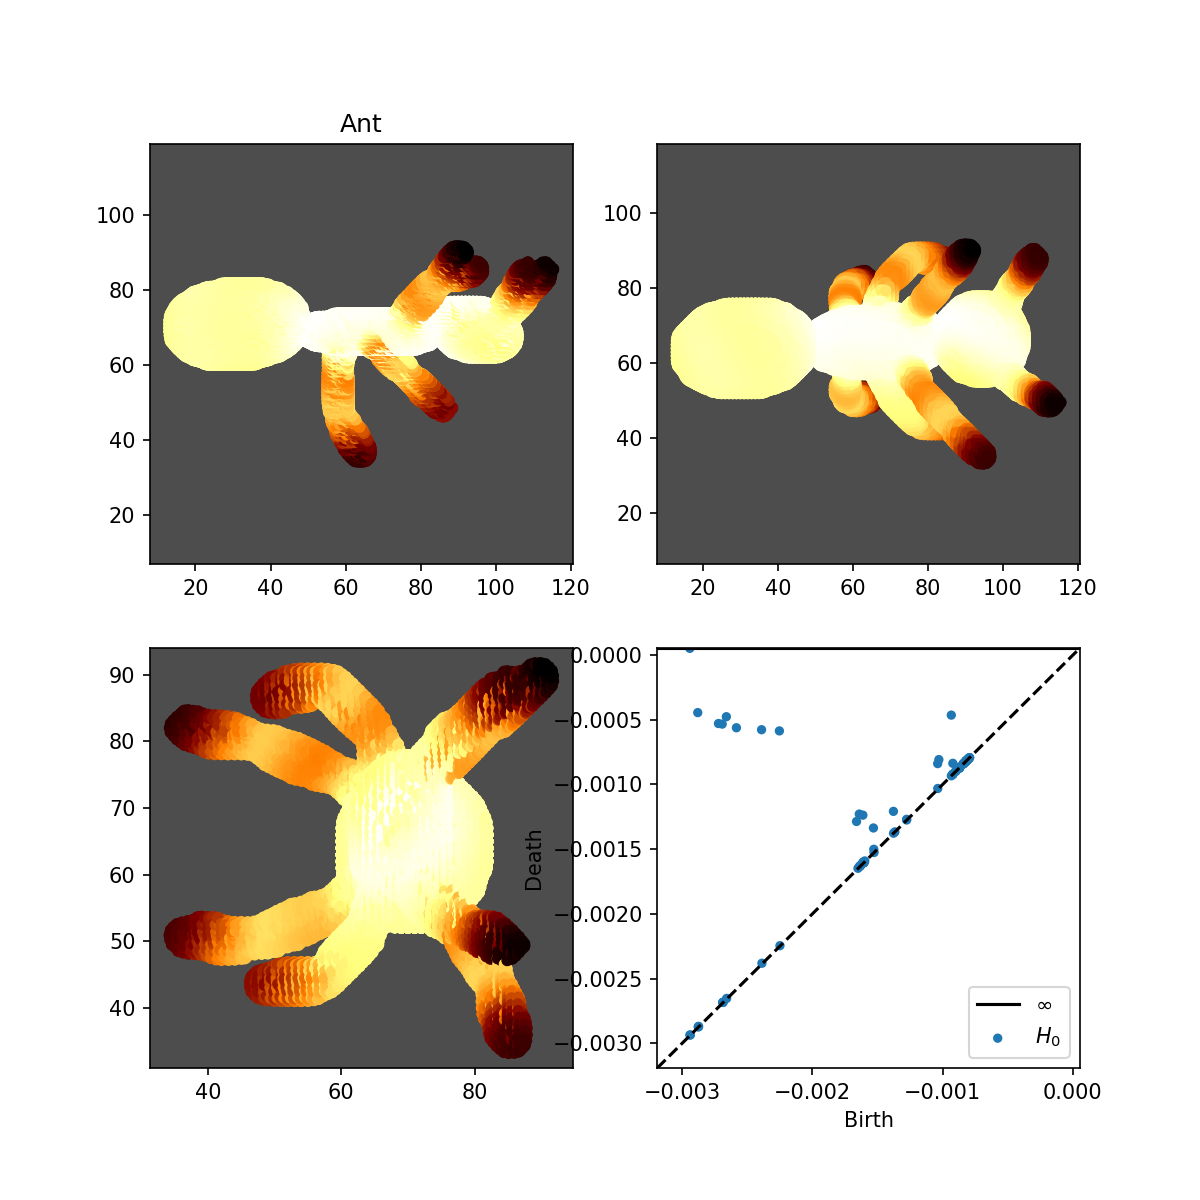

In [27]:
(VPos, _, ITris) = loadOffFile("Ant1.off")

x = fn(VPos, ITris)
I1 = do0DSublevelsetFiltrationMesh(VPos, ITris, fn)
plt.figure(figsize=(8, 8))
plt.subplot(221)
plotPCfn(VPos[:, [1, 0, 2]], x, cmap = 'afmhot')
plt.title("Ant")
plt.subplot(222)
X = np.array(VPos[:, [1, 2, 0]])
plotPCfn(X, x, cmap = 'afmhot')
plt.subplot(223)
plotPCfn(VPos[:, [0, 2, 1]], x, cmap = 'afmhot')
plt.subplot(224)
plot_dgms([I1])
plt.show()

<IPython.core.display.Javascript object>


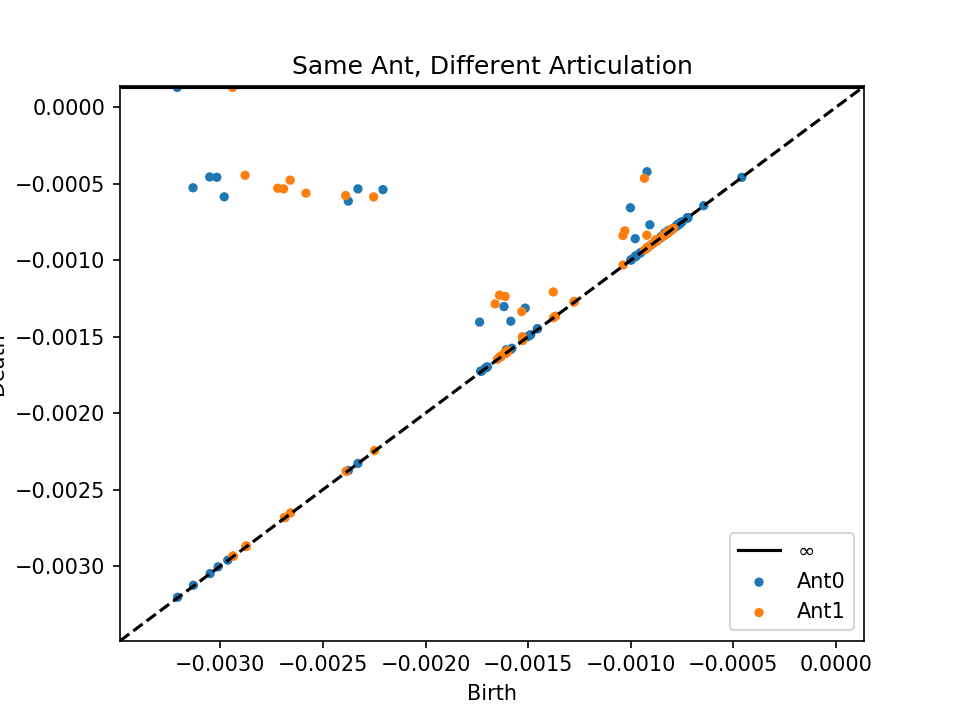

Text(0.5,1,'Same Ant, Different Articulation')

In [28]:
plt.figure()
plot_dgms([I0, I1], labels=["Ant0", "Ant1"])
plt.title("Same Ant, Different Articulation")

## Merge Trees

<img src = "MergeTreesSnippetsChiral.svg">

<IPython.core.display.Javascript object>


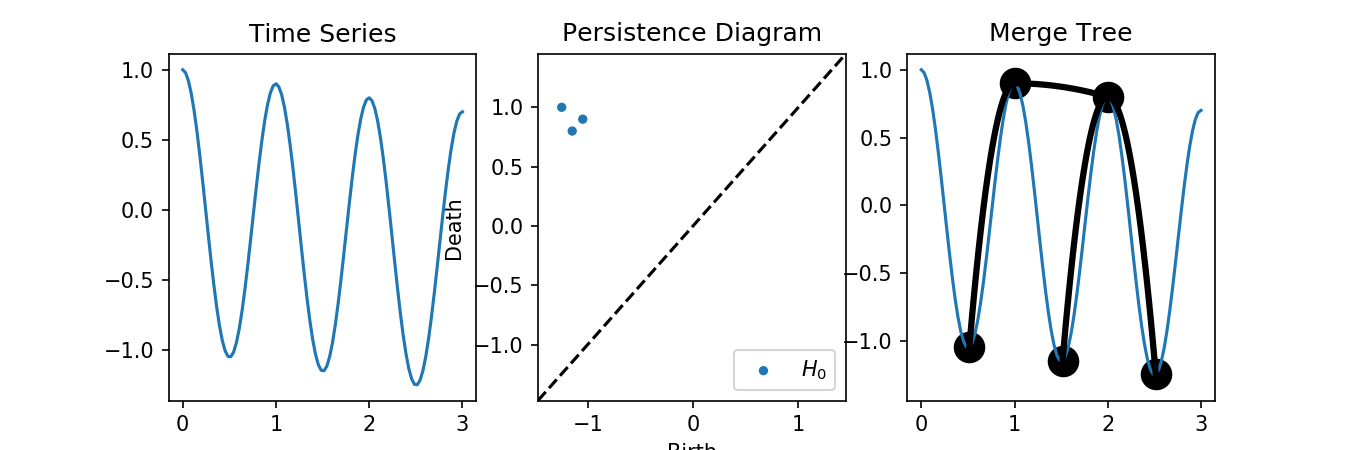

Text(0.5,1,'Merge Tree')

In [3]:
plt.figure(figsize=(9, 3))
t = np.linspace(0, 3, 100)
x = np.cos(2*np.pi*t) - 0.1*t

X = np.zeros((len(x), 2))
X[:, 0] = t
X[:, 1] = x
(MT, PS, I) = mergeTreeFrom1DTimeSeries(x)
T = wrapMergeTreeTimeSeries(MT, PS, X)

plt.subplot(131)
plt.plot(t, x)
plt.title("Time Series")
plt.subplot(132)
plot_dgms(I)
plt.title("Persistence Diagram")
plt.subplot(133)
plt.plot(t, x)
T.render(np.array([0, 0]))
plt.title("Merge Tree")

